In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
# sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew

# from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
# from statsmodels.formula.api import ols      # For n-way ANOVA
# from statsmodels.stats.anova import anova_lm # For n-way ANOVA
# from   scipy.stats import chi2_contingency   # For Chi-Sq

In [2]:
#Reading the csv file AxisInsurance.csv
df = pd.read_csv('insurance.csv')
insured=df.copy()

In [3]:
# inspect data, print top 5
insured.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# bottom 5 rows:
insured.tail(5)

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
insured.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
insured.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
insured.isnull().sum().values.sum()

0

In [10]:
print(insured.shape)
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])

(1338, 7)
Rows     :  1338
Columns  :  7


In [11]:
# insured[insured['Gender'] == '']
insured = insured.dropna()
insured.shape

(1338, 7)

In [12]:
insured.values

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.92],
       [18, 'male', 33.8, ..., 'no', 'southeast', 1725.55],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.46],
       ...,
       [18, 'female', 36.9, ..., 'no', 'southeast', 1629.83],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.95],
       [61, 'female', 29.1, ..., 'yes', 'northwest', 29141.36]],
      dtype=object)

In [13]:
print ("\nValues : \n", insured.values)
print ("\nFeatures : \n", list(insured.columns))
# print ("\nFeatures : \n", list(insured.columns.to_list()))

# print ("\nMissing values :  ", insured.isnull().sum().values.sum())

# print ("\nUnique values :  \n", insured.nunique())



Values : 
 [[19 'female' 27.9 ... 'yes' 'southwest' 16884.92]
 [18 'male' 33.8 ... 'no' 'southeast' 1725.55]
 [28 'male' 33.0 ... 'no' 'southeast' 4449.46]
 ...
 [18 'female' 36.9 ... 'no' 'southeast' 1629.83]
 [21 'female' 25.8 ... 'no' 'southwest' 2007.95]
 [61 'female' 29.1 ... 'yes' 'northwest' 29141.36]]

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']


In [14]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
#changing object dtype to category  to save memory
insured['sex']=insured['sex'].astype("category")
insured['smoker']=insured['smoker'].astype("category")
insured['region']=insured['region'].astype("category")


In [16]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [17]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [18]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
list_col


Index(['sex', 'smoker', 'region'], dtype='object')

In [19]:
list_col1=  insured.select_dtypes(['int']).columns
list_col1


Index(['age', 'children'], dtype='object')

In [20]:
#old hard ways to value count
cat = set(insured['sex'])
male_no = len(insured[insured['sex'] == 'male'])
female_no = len(insured[insured['sex'] == 'female'])
print(male_no)
print(female_no)

676
662


In [21]:
#Value count
insured['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [22]:
insured['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [23]:
insured['region'].value_counts()

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

In [24]:
list_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [25]:
for i in list_col:
    print(dict(insured[i].value_counts()))

{'male': 676, 'female': 662}
{'no': 1064, 'yes': 274}
{'southeast': 364, 'northwest': 325, 'southwest': 325, 'northeast': 324}


In [26]:
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


In [27]:
#Univariate Analysis

In [28]:
# # Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

In [29]:
len(insured[insured['sex'] == 'female'])

662

In [30]:
# Analyzing categorical data
data = {}
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  subcategory = list(insured[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]

data

{'sex': [['male', 'female'], [676, 662]],
 'smoker': [['no', 'yes'], [1064, 274]],
 'region': [['southeast', 'northwest', 'southwest', 'northeast'],
  [364, 325, 325, 324]]}

In [31]:
pd.DataFrame(data)

,sex,smoker,region
0,"[male, female]","[no, yes]","[southeast, northwest, southwest, northeast]"
1,"[676, 662]","[1064, 274]","[364, 325, 325, 324]"


In [32]:
list_col = insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    values = list(insured[list_col[i]].value_counts())
    subcategory = list(insured[list_col[i]].value_counts().index)
    print(values)
    print(subcategory)

[676, 662]
['male', 'female']
[1064, 274]
['no', 'yes']
[364, 325, 325, 324]
['southeast', 'northwest', 'southwest', 'northeast']


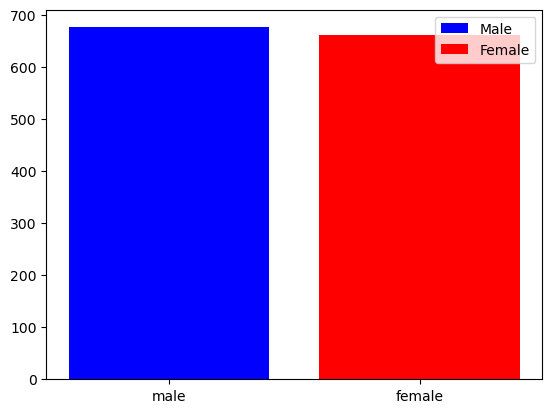

In [33]:
#Bar graph
plt.bar(data['sex'][0],data['sex'][1],label=['Male','Female'],
        color = ['b','r'])
plt.legend()
plt.show()

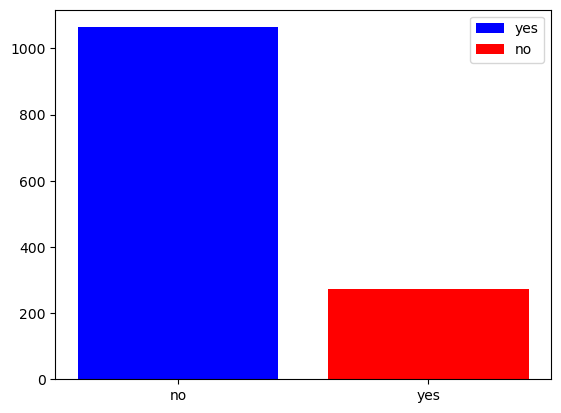

In [34]:
plt.bar(data['smoker'][0],data['smoker'][1],label=['yes','no'],
        color = ['b','r'])
plt.legend()
plt.show()

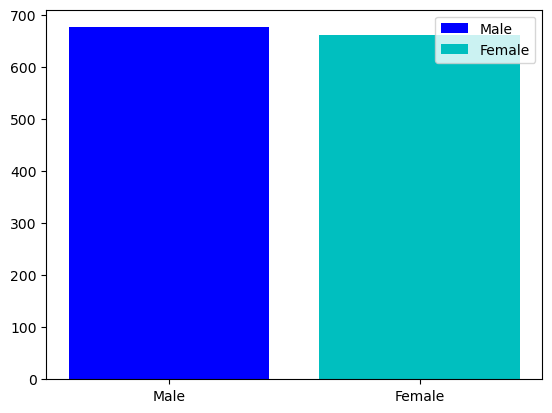

In [35]:
#Bar Graph:
no_of_male = len(insured[insured['sex'] == 'male'])
no_of_female = len(insured[insured['sex'] == 'female'])

plt.bar(['Male','Female'],[no_of_male,no_of_female],color = ['b','c'],label = ['Male','Female'])
plt.legend()
plt.show()

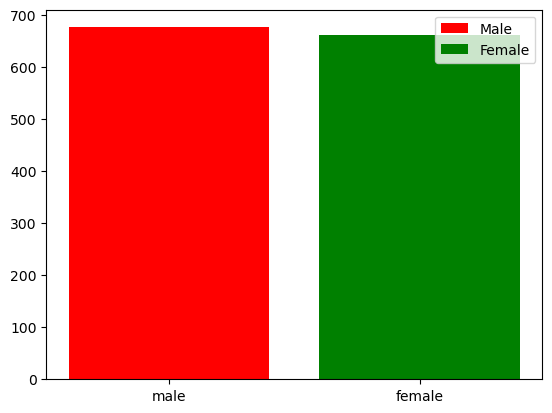

In [36]:
plot_data = dict(insured['sex'].value_counts())
plot_data
plt.bar(['male','female'],[plot_data['male'],plot_data['female']],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

<Axes: ylabel='count'>

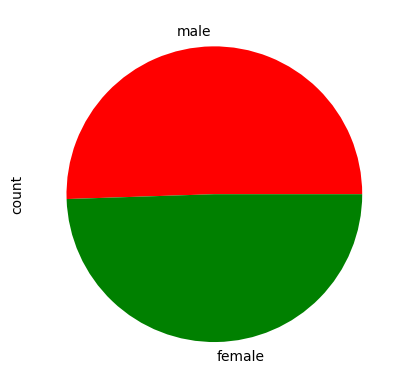

In [37]:
insured['sex'].value_counts().plot.pie(colors = ['r','g'])

<Axes: xlabel='sex'>

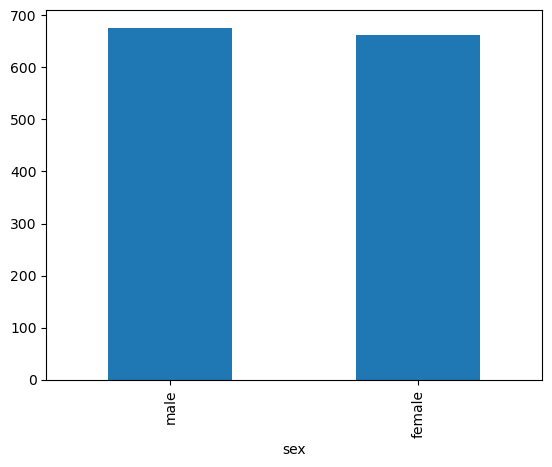

In [38]:
insured['sex'].value_counts().plot.bar()

<Axes: ylabel='count'>

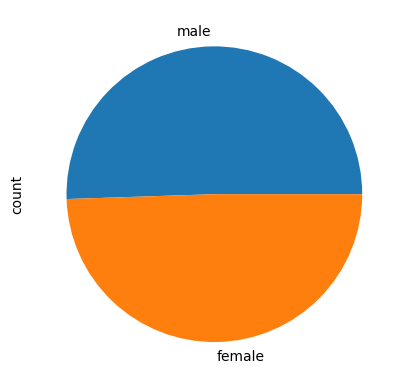

In [39]:
insured['sex'].value_counts().plot.pie()

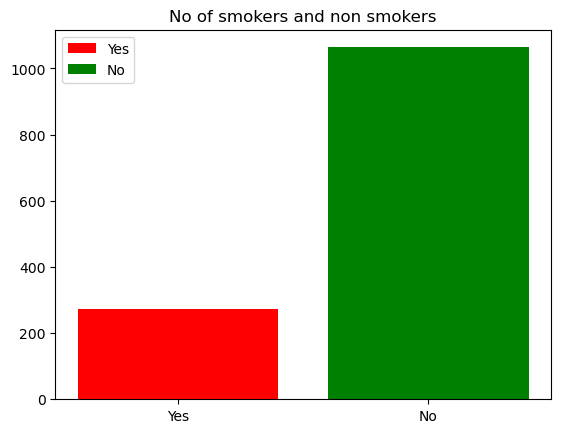

In [40]:
#Alternet
#for education level
no_of_yes = len(insured[insured['smoker'] == "yes"])
no_of_no = len(insured[insured['smoker'] == "no"])

plt.bar(["Yes","No"],[no_of_yes,no_of_no], color = ['r','g'], label=["Yes","No"])
plt.title('No of smokers and non smokers')
plt.legend()
plt.show()

In [41]:
plot_data = dict(insured['smoker'].value_counts())
plot_data

{'no': 1064, 'yes': 274}

In [42]:
key = plot_data.keys()
print(key)
values = plot_data.values()
print(values)

dict_keys(['no', 'yes'])
dict_values([1064, 274])


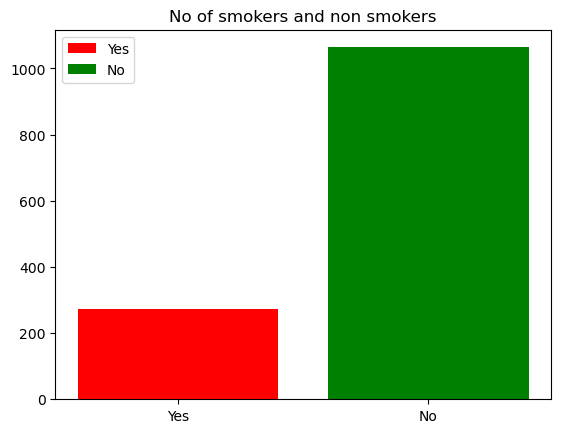

In [43]:
#Alternet
#for education level
no_of_yes = len(insured[insured['smoker'] == "yes"])
no_of_no = len(insured[insured['smoker'] == "no"])

plt.bar(["Yes","No"],[no_of_yes,no_of_no], color = ['r','g'], label=["Yes","No"])
plt.title('No of smokers and non smokers')
plt.legend()
plt.show()

<Axes: xlabel='region'>

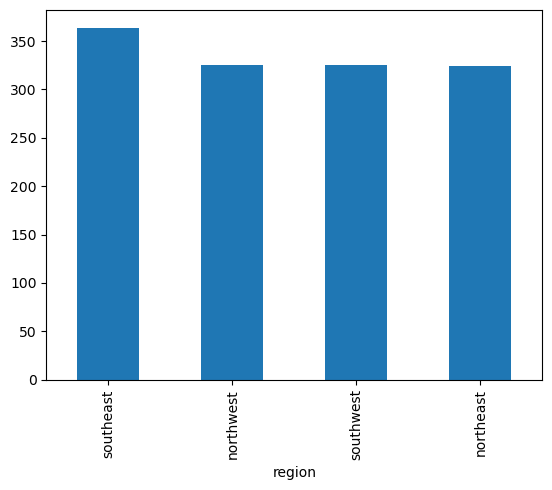

In [44]:
insured['region'].value_counts().plot.bar()

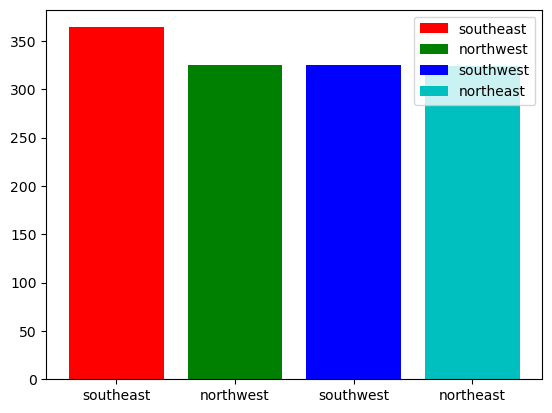

dict_keys(['southeast', 'northwest', 'southwest', 'northeast'])

In [45]:
plot_data = dict(insured['region'].value_counts())
plt.bar(plot_data.keys(),plot_data.values(),color = ['r','g','b','c'],label = plot_data.keys())
plt.legend()
plt.show()
plot_data
plot_data.keys()

[['southeast', 'northwest', 'southwest', 'northeast'], [364, 325, 325, 324]]


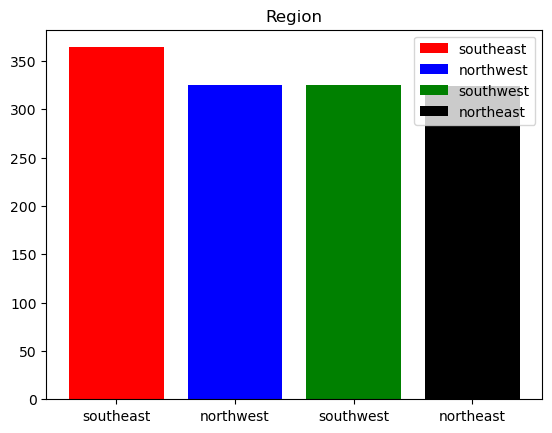

In [46]:
# #Alternate
print(data['region'])
plt.bar(data['region'][0],data['region'][1],
        label=['southeast', 'northwest', 'southwest', 'northeast'],
        color = ['r','b','g','k'])
plt.title('Region')
plt.legend()
plt.show()

In [47]:
## Bivariate & Multivariate Analysis

In [48]:
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [49]:
corr_insured = insured[['age','children','bmi','expenses']]
corr_insured

,age,children,bmi,expenses
0,19,0,27.9,16884.92
1,18,1,33.8,1725.55
2,28,3,33.0,4449.46
3,33,0,22.7,21984.47
4,32,0,28.9,3866.86
...,...,...,...,...
1333,50,3,31.0,10600.55
1334,18,0,31.9,2205.98
1335,18,0,36.9,1629.83
1336,21,0,25.8,2007.95


In [50]:
#correlation:
#Statistics and data science are often concerned about the relationships between two or more
#variables (or features) of a dataset

corr_insured.corr()

,age,children,bmi,expenses
age,1.000000,0.042469,0.109341,0.299008
children,0.042469,1.000000,0.012645,0.067998
bmi,0.109341,0.012645,1.000000,0.198576
expenses,0.299008,0.067998,0.198576,1.000000


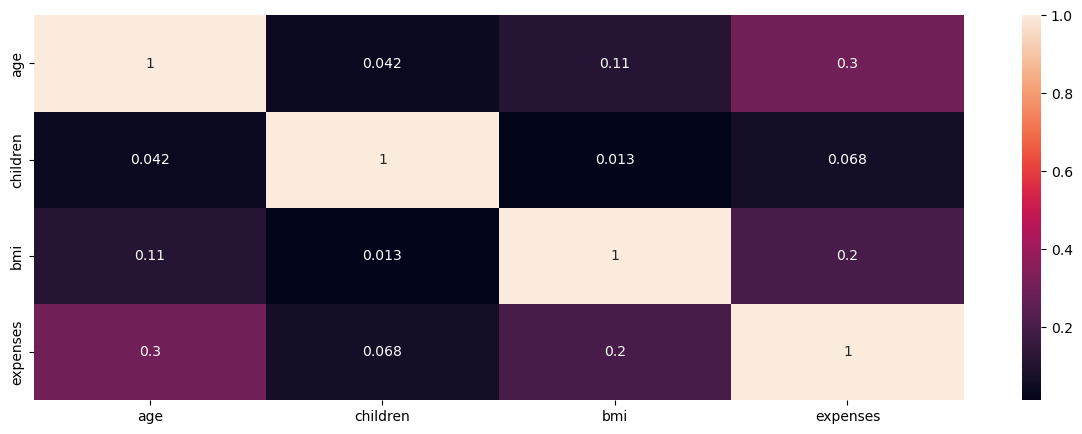

In [51]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_insured.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

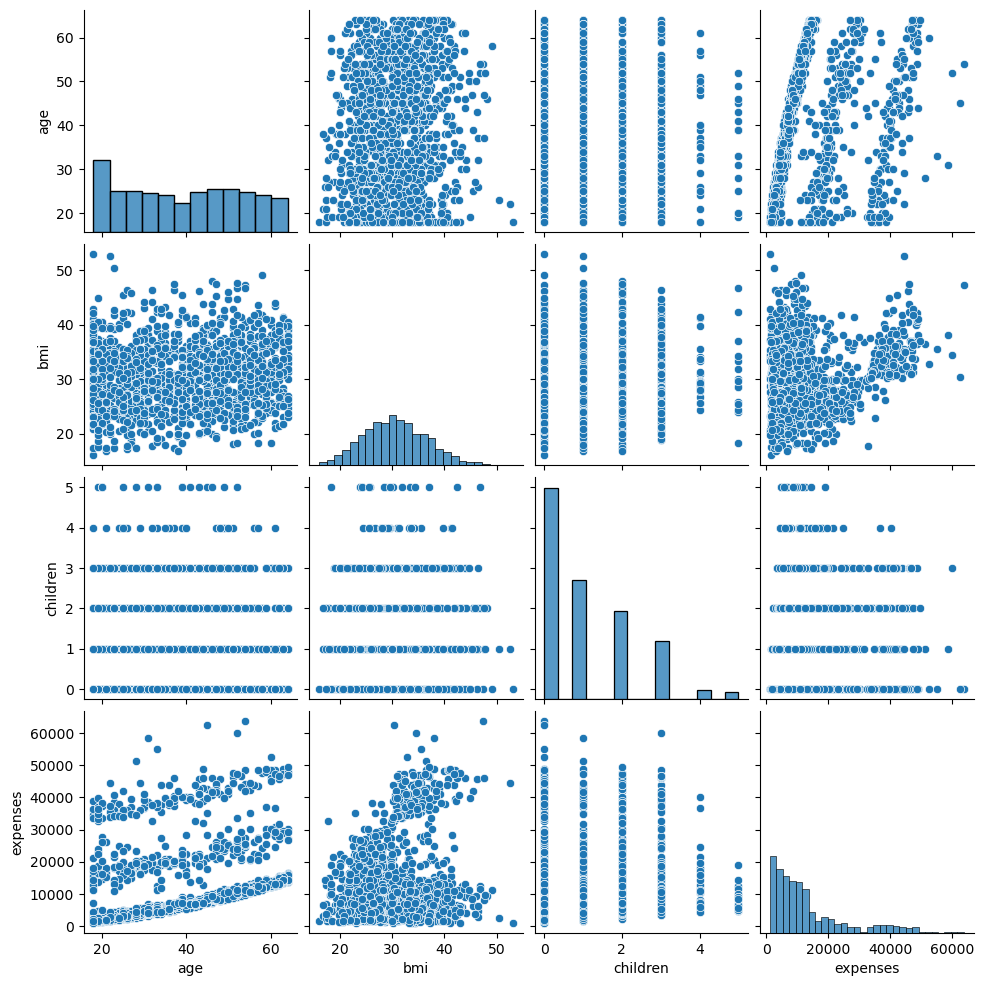

In [52]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured)
plt.show()

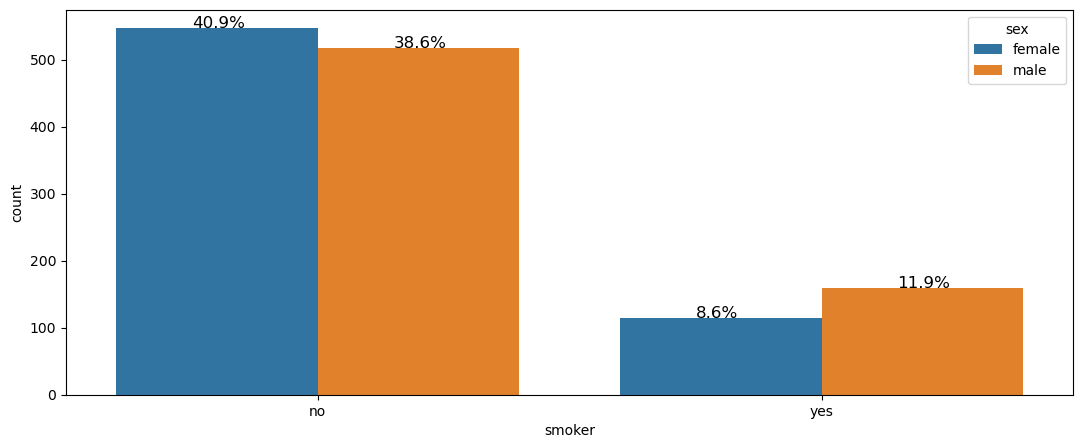

In [53]:
#Gender count plot : count plot is used in category data
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=insured)
bar_perc(ax,insured['smoker'])

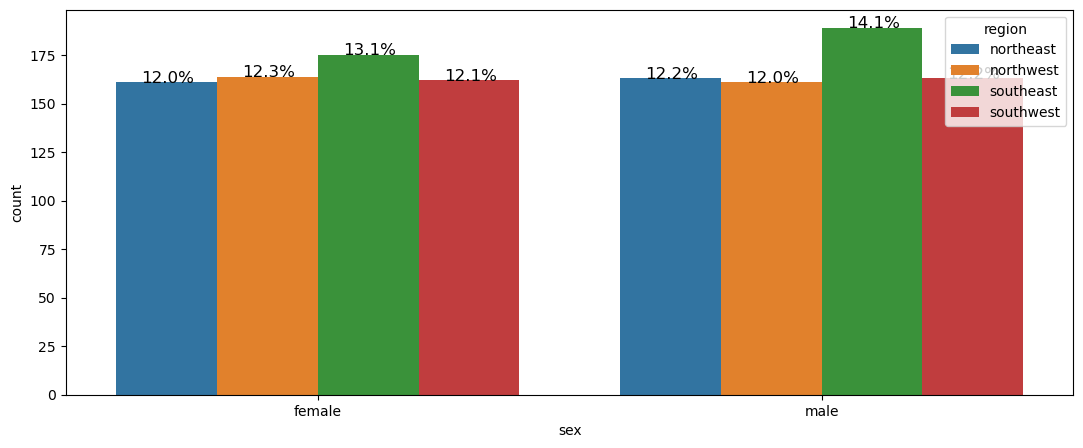

In [54]:
#Sex vs region
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='region',data=insured)
bar_perc(ax,insured['region'])


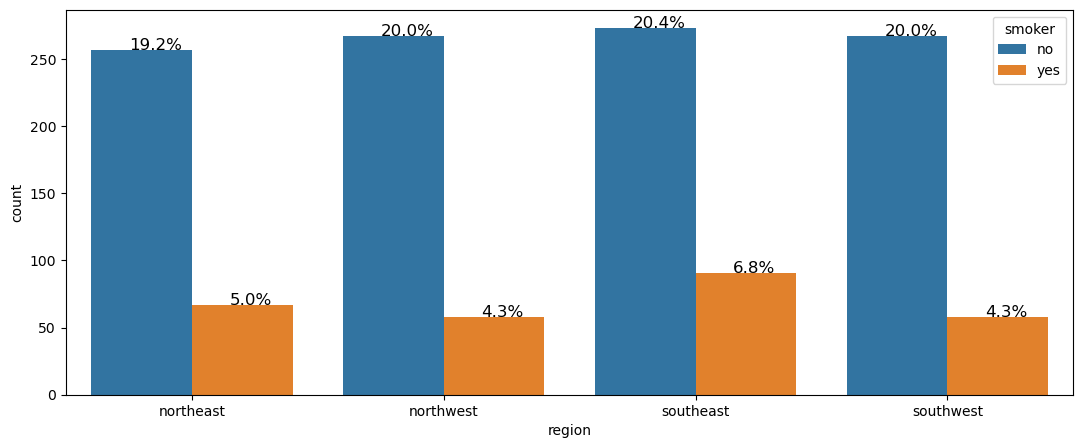

In [55]:
#region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
bar_perc(ax,insured['region'])

[Text(0.5, 1.0, 'Smoker vs Expenses')]

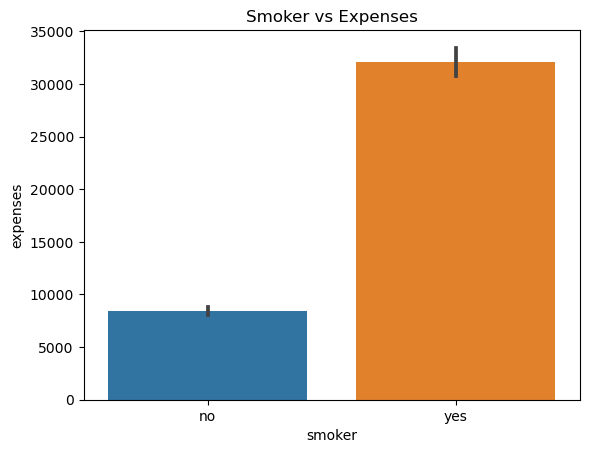

In [56]:
# #smoker vs Expenses
sns.barplot(x=insured.smoker,y=insured.expenses).set(title="Smoker vs Expenses")

[Text(0.5, 1.0, 'Sex vs Region')]

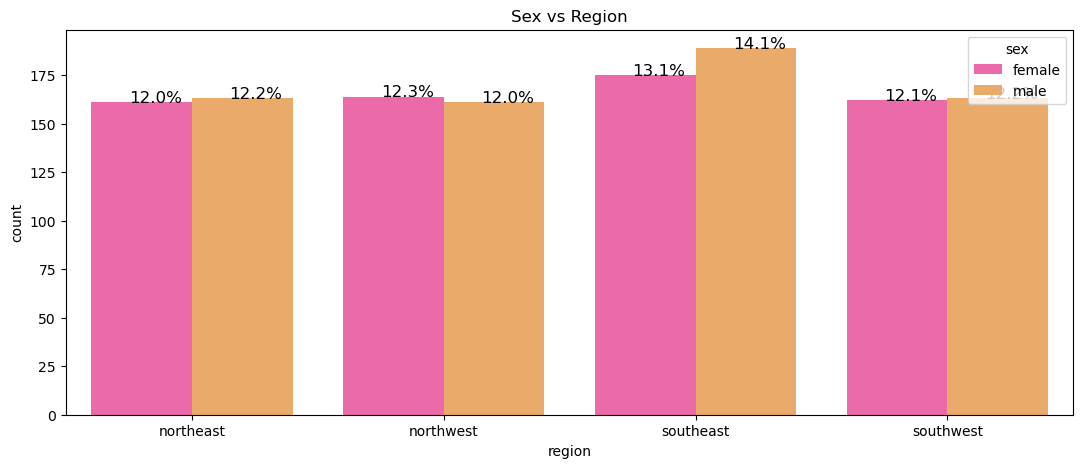

In [57]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=insured,palette='spring')
bar_perc(ax,insured['sex'])
ax.set(title="Sex vs Region")

[Text(0.5, 1.0, 'Sex vs Expenses')]

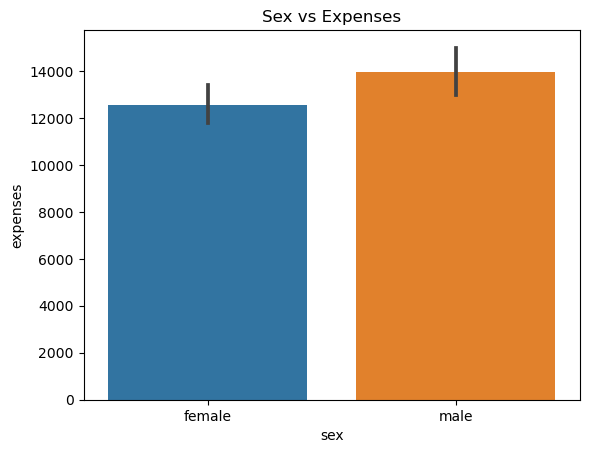

In [58]:
# #sex vs expenses
sns.barplot(x=insured.sex,y=insured.expenses).set(title="Sex vs Expenses")



<Axes: xlabel='region', ylabel='expenses'>

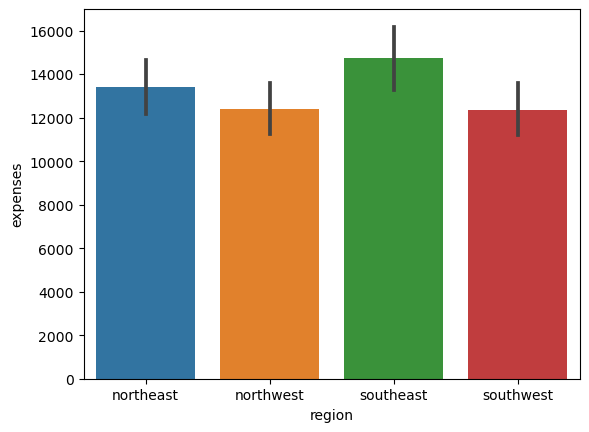

In [59]:
sns.barplot(x=insured.region,y=insured.expenses)




Text(0.5, 1.0, 'Sex vs Region')

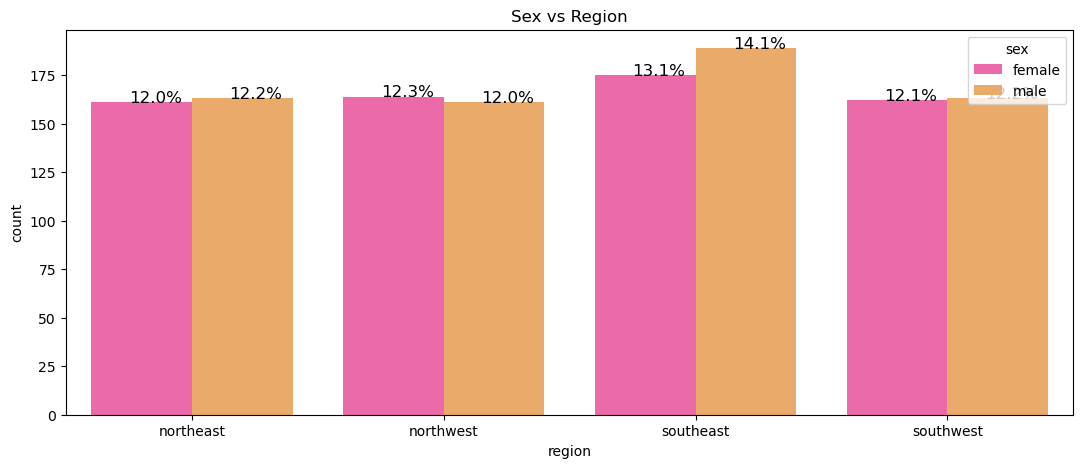

In [60]:
plt.figure(figsize=(13, 5))
ax = sns.countplot(x='region', hue='sex', data=insured, palette='spring')


bar_perc(ax,insured['sex'])
ax.set_title("Sex vs Region")



In [61]:
insured.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [62]:
# GROUP BY

In [63]:
insured.groupby(insured.sex).expenses.mean()      #GROUP BY BY Gender

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

In [64]:
insured.groupby(insured['region']).expenses.mean()      #GROUP BY Region

region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

In [65]:
insured.groupby(insured.smoker).expenses.mean()

smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64

<Axes: xlabel='smoker'>

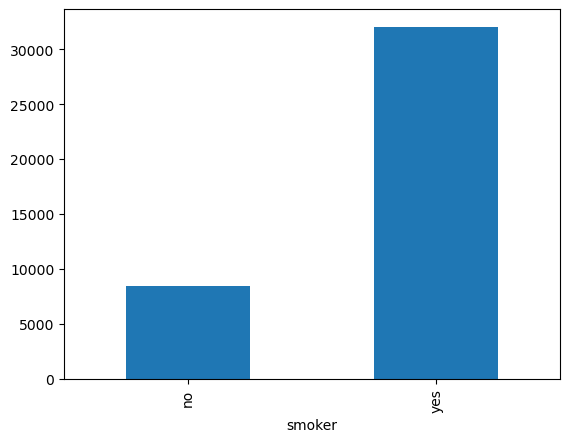

In [66]:
insured.groupby(insured.smoker).expenses.mean().plot.bar()

In [67]:
dict(insured.groupby(insured.smoker).expenses.mean() )

{'no': 8434.26844924812, 'yes': 32050.23197080292}

In [68]:
dict(insured.groupby(insured['region']).expenses.mean())

{'northeast': 13406.384691358024,
 'northwest': 12417.57516923077,
 'southeast': 14735.411538461538,
 'southwest': 12346.937907692307}

In [69]:
plot_data = dict(insured.groupby(insured['region']).expenses.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())
print(plot_key)
print(plot_value)

['northeast', 'northwest', 'southeast', 'southwest']
[13406.384691358024, 12417.57516923077, 14735.411538461538, 12346.937907692307]


[Text(0.5, 1.0, 'Gender Vs Salary')]

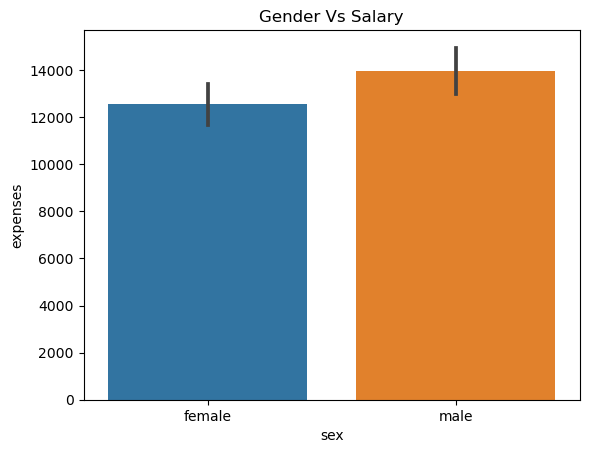

In [70]:
#Plot of Gender and Salary
sns.barplot(x=insured.sex,y=insured.expenses).set(title='Gender Vs Salary')




['female', 'male']
[12569.578897280968, 13956.751420118344]


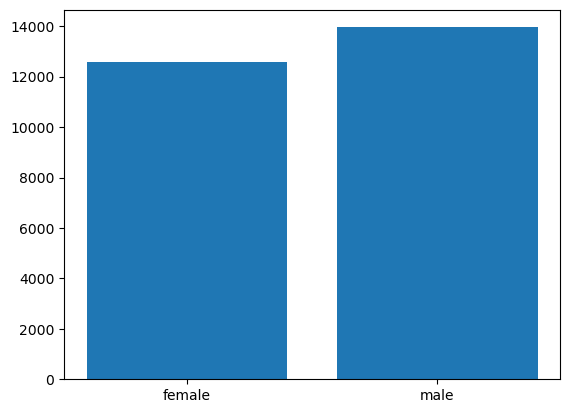

In [71]:
plot_data = dict(insured.groupby(insured.sex).expenses.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())
print(plot_key)
print(plot_value)
plt.bar(plot_key,plot_value)
plt.show()


<Axes: xlabel='sex'>

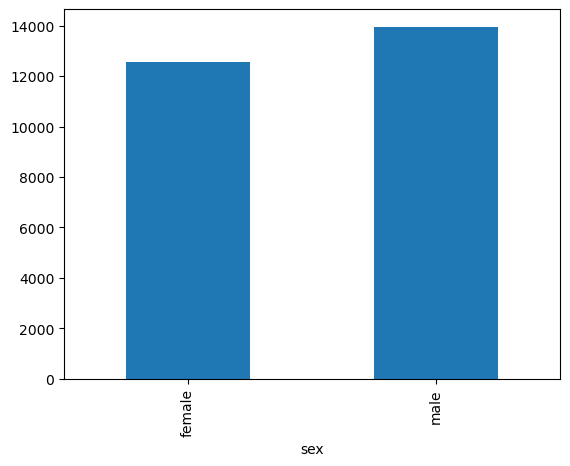

In [72]:
insured.groupby(insured.sex).expenses.mean().plot.bar()

<Axes: xlabel='sex'>

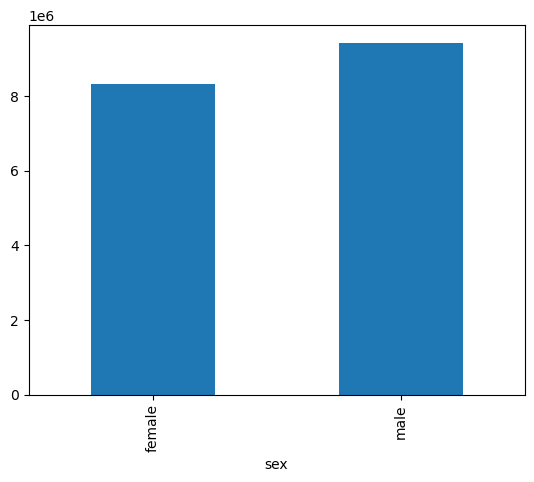

In [73]:
insured.groupby(insured.sex).expenses.sum().plot.bar()

[Text(0.5, 1.0, 'region Vs Charges')]

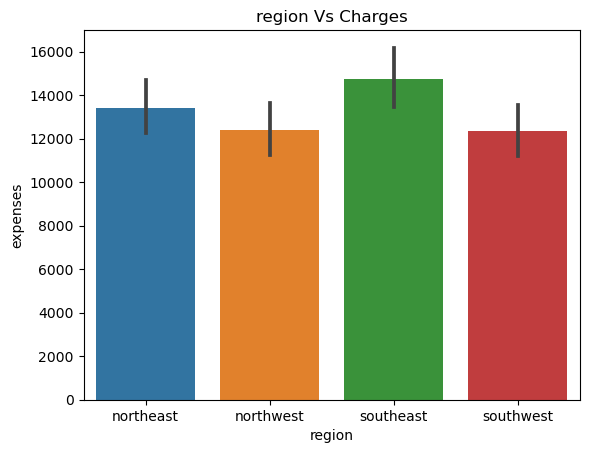

In [74]:
sns.barplot(x=insured['region'],y=insured.expenses).set(title='region Vs Charges')

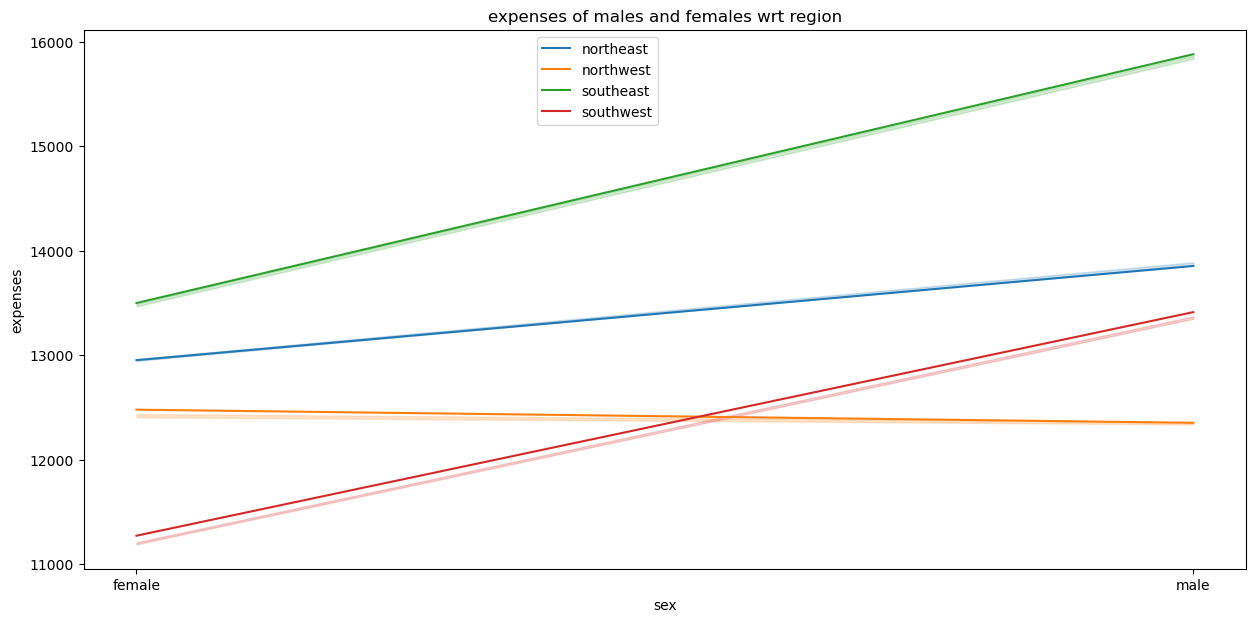

In [75]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["sex"], y =insured["expenses"],hue=insured["region"],ci=1).set(title= 'expenses of males and females wrt region')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

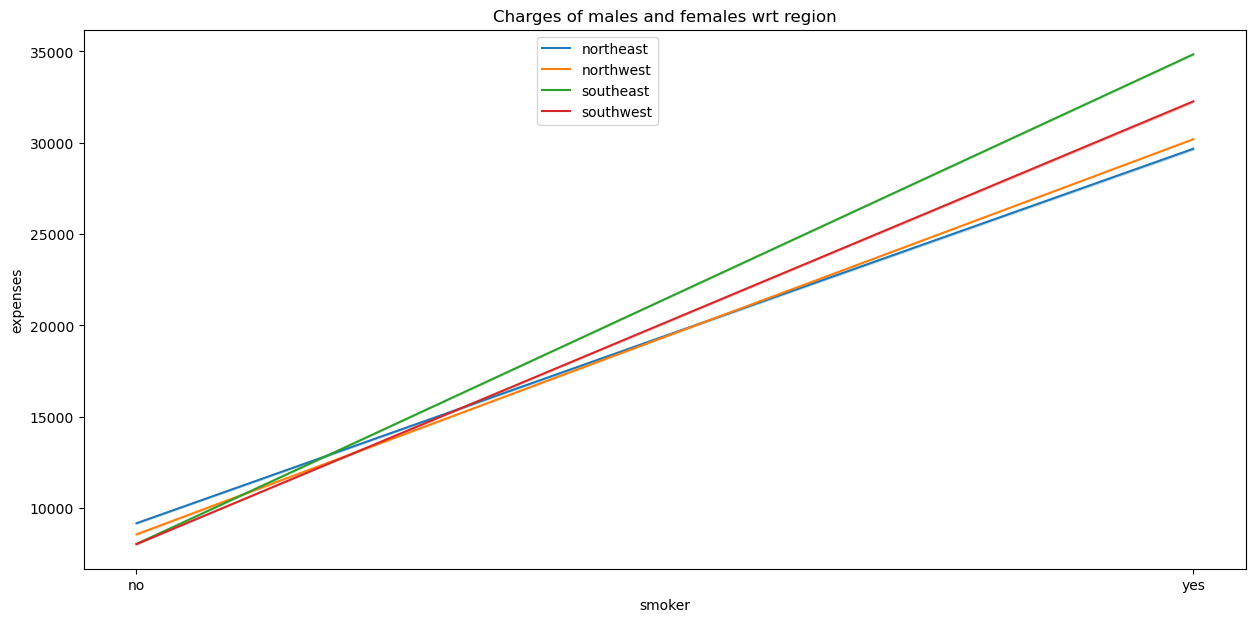

In [76]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["smoker"], y =insured["expenses"],hue=insured["region"],ci=1).set(title= 'Charges of males and females wrt region')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

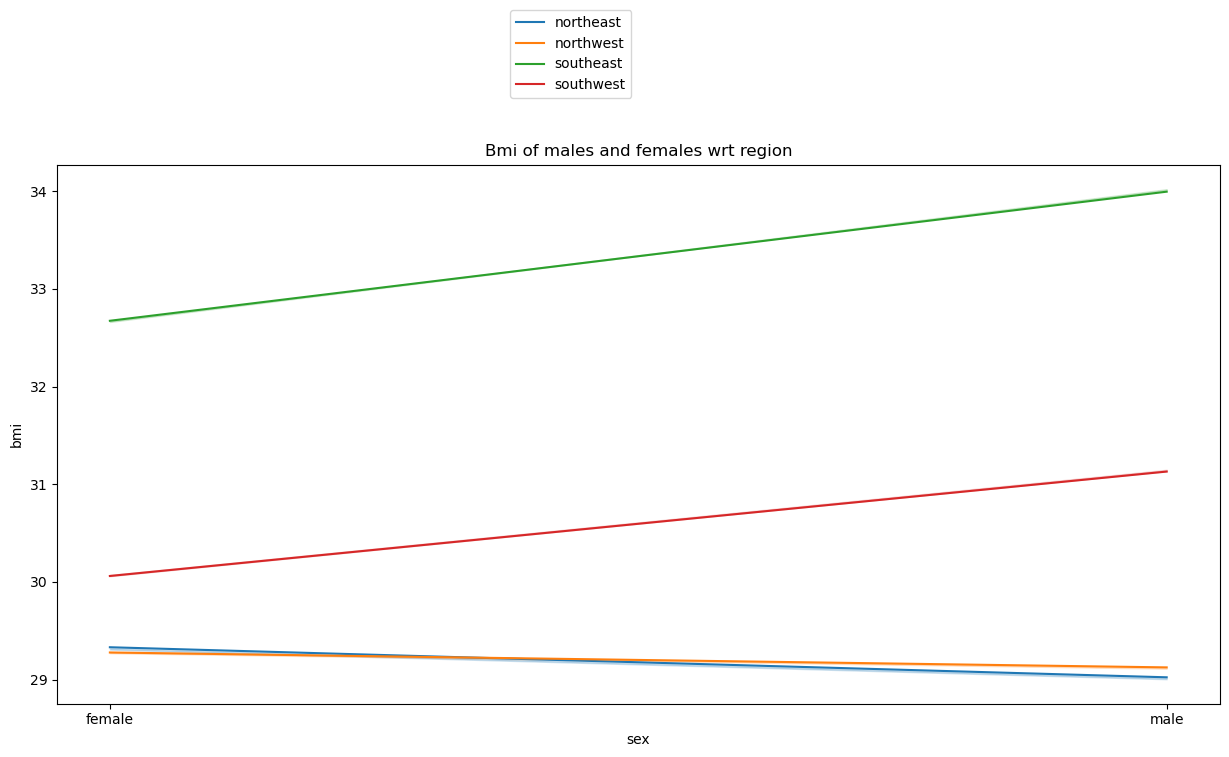

In [77]:
#multivariate
plt.figure(figsize=(15,7)) # x ma category variable, y ma numerical ani x ma category variable
sns.lineplot(x = insured["sex"], y =insured["bmi"],hue=insured["region"],ci=1).set(title= 'Bmi of males and females wrt region')
plt.legend(bbox_to_anchor=(0.5, 1.3))
plt.show()

In [78]:
#Cross tab
edu_gender_insurance =pd.crosstab(index=insured['region'], columns=insured['sex']  , values=insured.expenses, aggfunc='mean')
edu_gender_insurance

sex,female,male
region,,
northeast,12953.203106,13854.005767
northwest,12479.870244,12354.119317
southeast,13499.669257,15879.617354
southwest,11274.411667,13412.884233


In [79]:
#Cross tab
edu_gender_insurance =pd.crosstab(index=insured['region'], columns=insured['sex']  , values=insured.expenses, aggfunc='sum')
edu_gender_insurance

sex,female,male
region,,
northeast,2085465.70,2258202.94
northwest,2046698.72,1989013.21
southeast,2362442.12,3001247.68
southwest,1826454.69,2186300.13


In [80]:
gender_edu_insurance=pd.crosstab(index=insured['sex'], columns=insured['region']  , values=insured.expenses,aggfunc='sum')
gender_edu_insurance

region,northeast,northwest,southeast,southwest
sex,,,,
female,2085465.70,2046698.72,2362442.12,1826454.69
male,2258202.94,1989013.21,3001247.68,2186300.13


In [81]:
gender_edu_insurance=pd.crosstab(index=insured['sex'], columns=insured['region']  , values=insured.expenses,aggfunc='mean')
gender_edu_insurance

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203106,12479.870244,13499.669257,11274.411667
male,13854.005767,12354.119317,15879.617354,13412.884233


In [82]:
# plot directly from dataframe

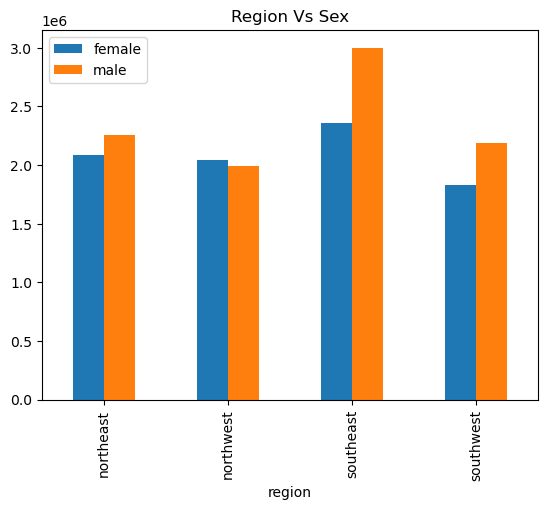

In [83]:
edu_gender_insurance.plot(kind='bar',title="Region Vs Sex")
plt.legend(loc='upper left')
plt.show()

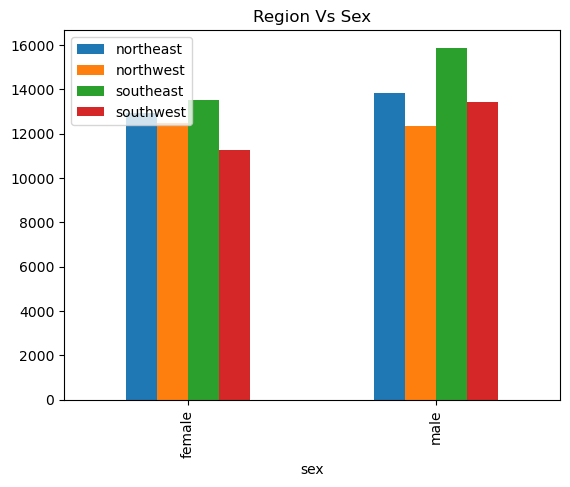

In [84]:
gender_edu_insurance.plot(kind='bar',title="Region Vs Sex")
plt.legend(loc='upper left')
plt.show()

In [85]:
# converting quantitative data to qualitative
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [86]:
pd.set_option('display.max.rows', 1338)
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [87]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [88]:
#creating groups of age
category = pd.cut(insured.age,bins=[15,20,25,30,35,40,45,50,55,60,65],labels=['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65'])
insured.insert(1,'AgeGroup',category)


In [89]:
insured

,age,AgeGroup,sex,bmi,children,smoker,region,expenses
0,19,15-20,female,27.9,0,yes,southwest,16884.92
1,18,15-20,male,33.8,1,no,southeast,1725.55
2,28,25-30,male,33.0,3,no,southeast,4449.46
3,33,30-35,male,22.7,0,no,northwest,21984.47
4,32,30-35,male,28.9,0,no,northwest,3866.86
5,31,30-35,female,25.7,0,no,southeast,3756.62
6,46,45-50,female,33.4,1,no,southeast,8240.59
7,37,35-40,female,27.7,3,no,northwest,7281.51
8,37,35-40,male,29.8,2,no,northeast,6406.41
9,60,55-60,female,25.8,0,no,northwest,28923.14


In [90]:
age_group = insured.groupby(insured.AgeGroup).expenses.mean()
age_group

AgeGroup
15-20     8713.482771
20-25     9529.919643
25-30    10086.132754
30-35    10929.364692
35-40    12366.023071
40-45    14538.651241
45-50    15013.603472
50-55    16988.005500
55-60    17145.495040
60-65    21063.163407
Name: expenses, dtype: float64

In [91]:
age_group = insured['AgeGroup'].value_counts()
age_group

AgeGroup
15-20    166
45-50    144
20-25    140
50-55    140
25-30    138
40-45    137
30-35    130
35-40    127
55-60    125
60-65     91
Name: count, dtype: int64

In [92]:
age_group = insured.groupby(insured.AgeGroup).expenses.mean()
age_group1 = insured['AgeGroup'].value_counts()
print(age_group)
print(age_group1)

AgeGroup
15-20     8713.482771
20-25     9529.919643
25-30    10086.132754
30-35    10929.364692
35-40    12366.023071
40-45    14538.651241
45-50    15013.603472
50-55    16988.005500
55-60    17145.495040
60-65    21063.163407
Name: expenses, dtype: float64
AgeGroup
15-20    166
45-50    144
20-25    140
50-55    140
25-30    138
40-45    137
30-35    130
35-40    127
55-60    125
60-65     91
Name: count, dtype: int64


In [93]:
category1=pd.cut(insured['bmi'],bins=[15,20,25,30,35,40,45,50,55],labels=['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55'])
insured.insert(2,'Bmi_group',category1)

In [94]:
insured.head()

,age,AgeGroup,Bmi_group,sex,bmi,children,smoker,region,expenses
0,19,15-20,25-30,female,27.9,0,yes,southwest,16884.92
1,18,15-20,30-35,male,33.8,1,no,southeast,1725.55
2,28,25-30,30-35,male,33.0,3,no,southeast,4449.46
3,33,30-35,20-25,male,22.7,0,no,northwest,21984.47
4,32,30-35,25-30,male,28.9,0,no,northwest,3866.86


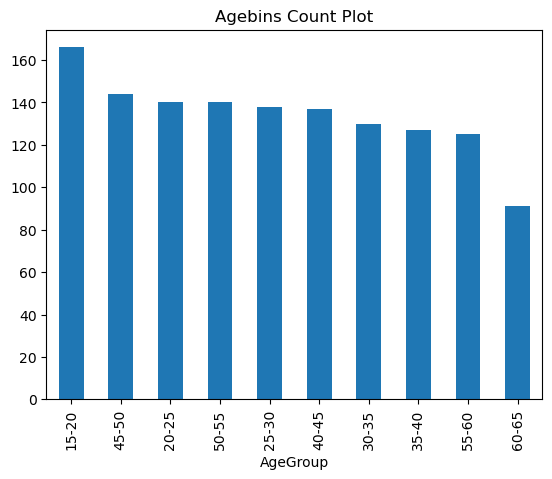

In [95]:
age_group = insured['AgeGroup'].value_counts()
age_group.plot(kind='bar',title="Agebins Count Plot")
plt.show()

In [96]:
age_bin_cat = insured.groupby(insured.AgeGroup).expenses.mean()
age_bin_cat

AgeGroup
15-20     8713.482771
20-25     9529.919643
25-30    10086.132754
30-35    10929.364692
35-40    12366.023071
40-45    14538.651241
45-50    15013.603472
50-55    16988.005500
55-60    17145.495040
60-65    21063.163407
Name: expenses, dtype: float64

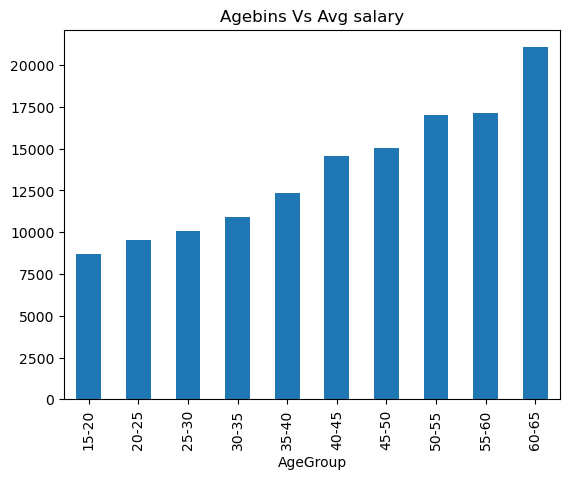

In [97]:
age_bin_cat.plot(kind='bar',title="Agebins Vs Avg salary")
plt.show()



In [98]:
#multi variate data analysis
insured.groupby(['region','sex','smoker']).expenses.mean()

region     sex     smoker
northeast  female  no         9640.427121
                   yes       28032.045517
           male    no         8664.042640
                   yes       30926.252895
northwest  female  no         8786.998519
                   yes       29670.824828
           male    no         8320.689167
                   yes       30713.180690
southeast  female  no         8440.205396
                   yes       33034.821389
           male    no         7609.003731
                   yes       36029.839636
southwest  female  no         8234.091702
                   yes       31687.988571
           male    no         7778.906111
                   yes       32598.863784
Name: expenses, dtype: float64

In [99]:
insured.groupby(['region','sex','smoker']).expenses.mean().unstack()

smoker                     no           yes
region    sex                              
northeast female  9640.427121  28032.045517
          male    8664.042640  30926.252895
northwest female  8786.998519  29670.824828
          male    8320.689167  30713.180690
southeast female  8440.205396  33034.821389
          male    7609.003731  36029.839636
southwest female  8234.091702  31687.988571
          male    7778.906111  32598.863784

<Axes: title={'center': 'Region vs Smoker vs Expenses'}, xlabel='region,smoker'>

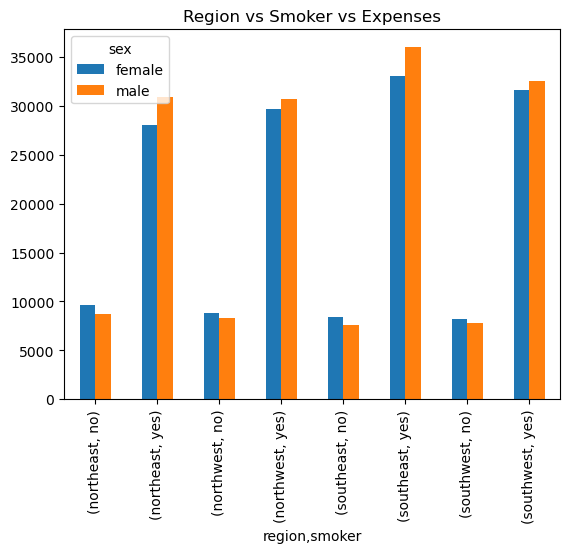

In [100]:
insured.groupby(['region','smoker','sex']).expenses.mean().unstack().plot(kind='bar',title="Region vs Smoker vs Expenses")

<Axes: title={'center': 'Sex vs Smoker vs Region vs Expenses '}, xlabel='sex,smoker'>

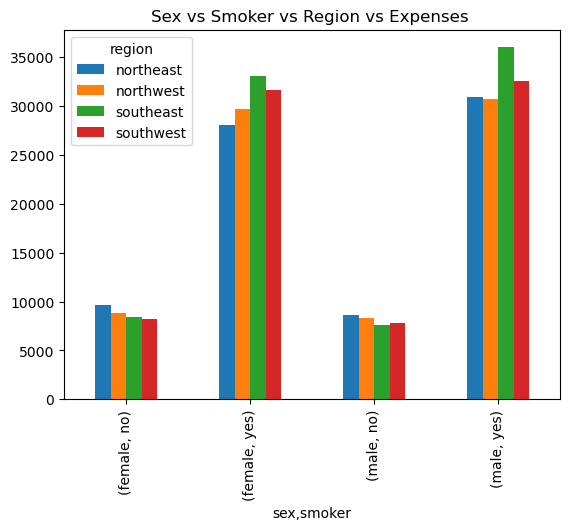

In [101]:
insured.groupby(['sex','smoker','region']).expenses.mean().unstack().plot(kind='bar',title="Sex vs Smoker vs Region vs Expenses ")

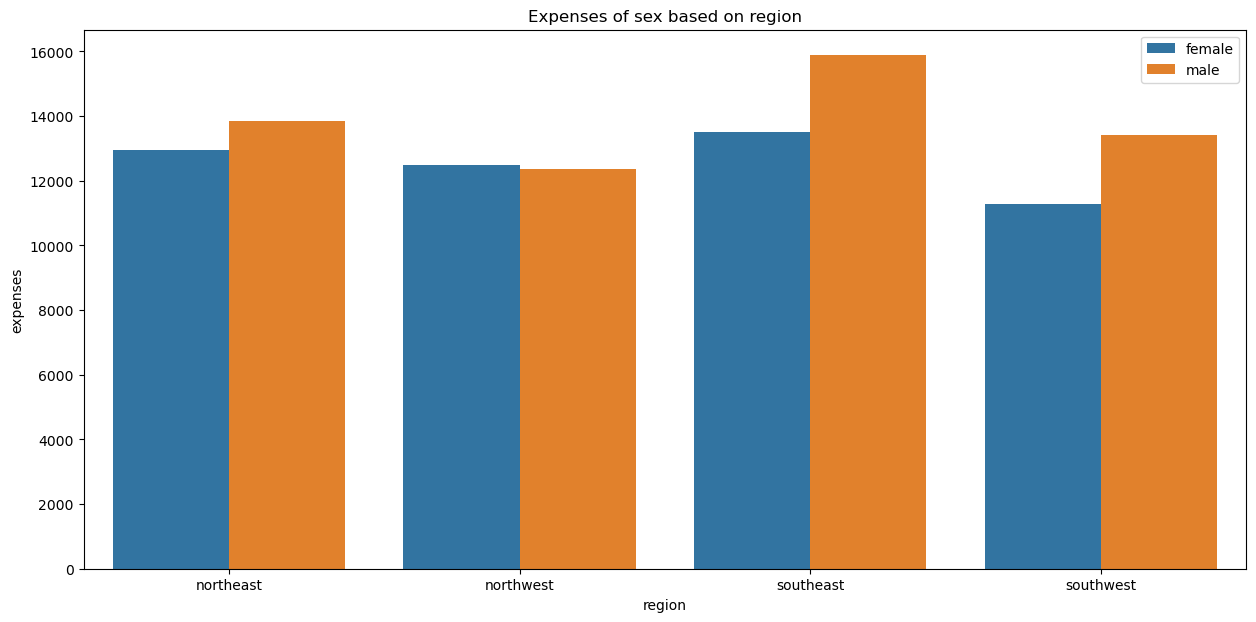

In [102]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["region"],y=insured["expenses"],hue=insured['sex'],ci=0).set(title= 'Expenses of sex based on region')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

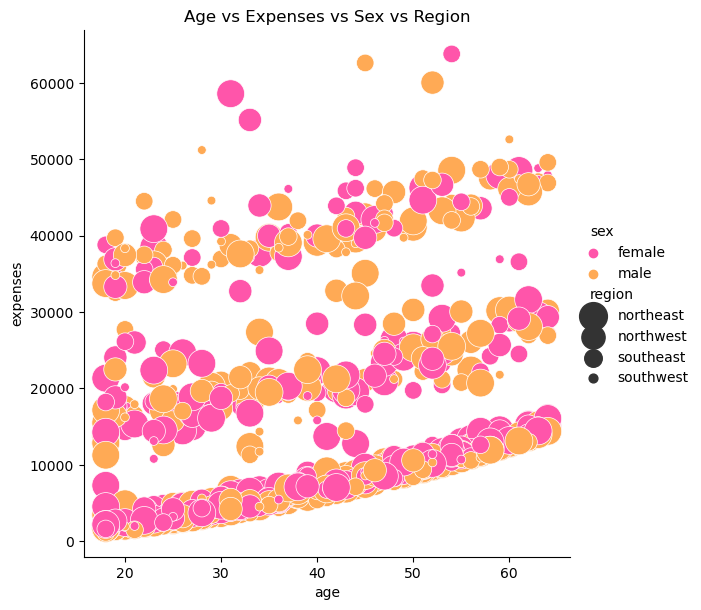

In [103]:
sns.relplot(x=insured['age'], y=insured["expenses"], hue=insured['sex'], size=  insured['region'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Age vs Expenses vs Sex vs Region');

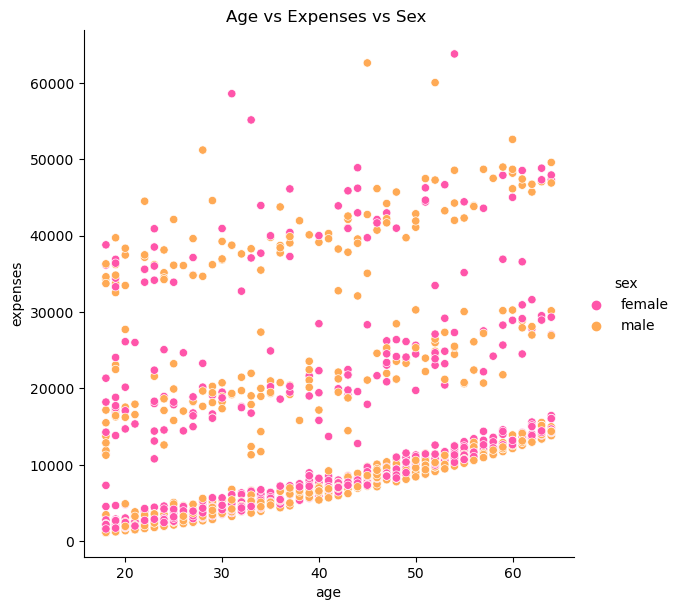

In [104]:
sns.relplot(x=insured['age'], y=insured["expenses"], hue=insured['sex'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Age vs Expenses vs Sex ');

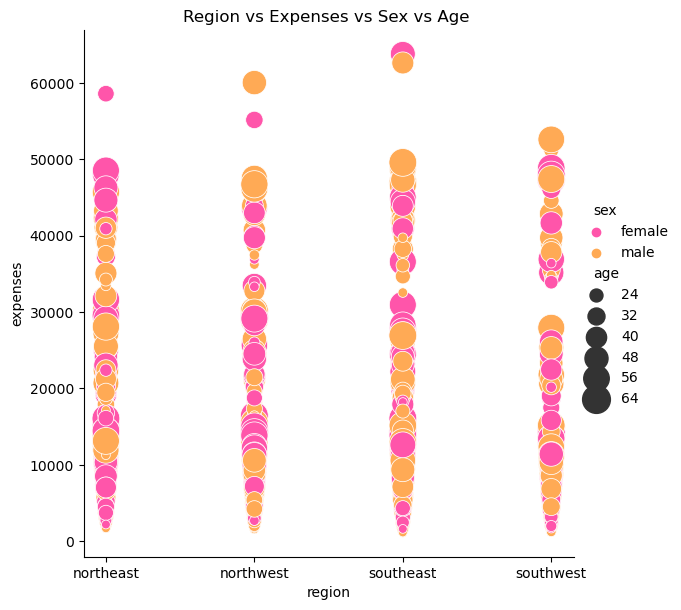

In [105]:
sns.relplot(x=insured['region'], y=insured["expenses"], hue=insured['sex'],size=  insured['age'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Region vs Expenses vs Sex vs Age ');

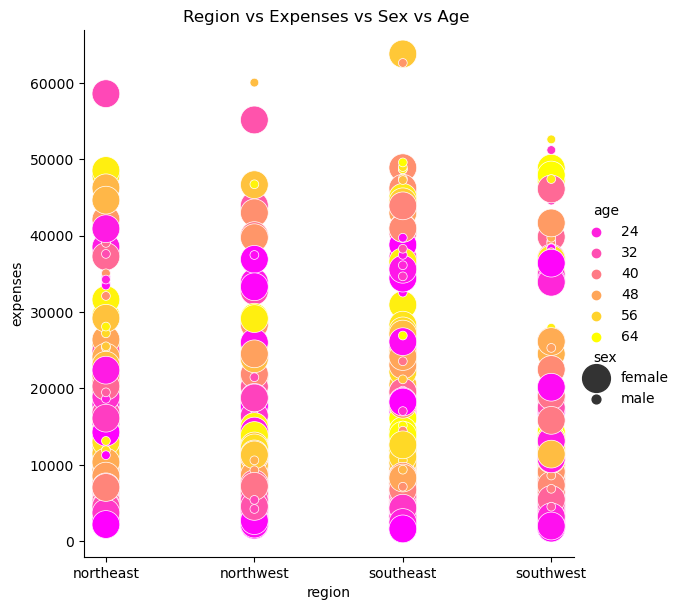

In [106]:
sns.relplot(x=insured['region'], y=insured["expenses"], hue=insured['age'],size=  insured['sex'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Region vs Expenses vs Sex vs Age ');